In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings
from math import exp
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import sklearn.neighbors._base

# Ignore warning messages.
warnings.filterwarnings("ignore") 

# Read data from the csv file and convert it into a dataframe.
df = pd.read_csv('SelectIndicators_07-18-13_07-18-23.csv')
df.drop(columns='Row Labels', axis=1,inplace=True)
df.head()


,"CHLOROPHYLL A, CORRECTED FOR PHEOPHYTIN","CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN","DEPTH, SECCHI DISK DEPTH","NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)",ORTHOPHOSPHATE,PHOSPHORUS,"TOTAL NITROGEN, MIXED FORMS",TURBIDITY
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,106.299215,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,82.677162,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,59.055118,NaN,NaN,NaN,NaN,NaN


In [8]:
df.dropna(axis=0,how='all',inplace=True)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 636402 entries, 2 to 716433
Data columns (total 8 columns):
 #   Column                                                        Non-Null Count   Dtype  
---  ------                                                        --------------   -----  
 0   CHLOROPHYLL A, CORRECTED FOR PHEOPHYTIN                       141750 non-null  float64
 1   CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN                     81350 non-null   float64
 2   DEPTH, SECCHI DISK DEPTH                                      403410 non-null  float64
 3   NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)  67876 non-null   float64
 4   ORTHOPHOSPHATE                                                108795 non-null  float64
 5   PHOSPHORUS                                                    230497 non-null  float64
 6   TOTAL NITROGEN, MIXED FORMS                                   10068 non-null   float64
 7   TURBIDITY                                                

In [9]:

#Eliminating rows with nan
#df = df.replace(np.nan,0,regex=True)
df = df[df['NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)'].between(0, 6900)]
#df = df[df['PHOSPHORUS'].between(0, 1000)]
#df = df[df['CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN'].between(0, 500)]
#df = df[df['DEPTH, SECCHI DISK DEPTH'].between(0, 600)]
#df = df[df['CHLOROPHYLL A, CORRECTED FOR PHEOPHYTIN'].between(0, 400)]
#df.drop(columns=['TOTAL NITROGEN, MIXED FORMS','TURBIDITY','ORTHOPHOSPHATE'],axis=1,inplace=True)
df.drop(columns=['TOTAL NITROGEN, MIXED FORMS'],axis=1, inplace=True)
df.dropna(axis=0,thresh=5,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35275 entries, 1366 to 714390
Data columns (total 7 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   CHLOROPHYLL A, CORRECTED FOR PHEOPHYTIN                       30856 non-null  float64
 1   CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN                     28594 non-null  float64
 2   DEPTH, SECCHI DISK DEPTH                                      34219 non-null  float64
 3   NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)  35275 non-null  float64
 4   ORTHOPHOSPHATE                                                10379 non-null  float64
 5   PHOSPHORUS                                                    31410 non-null  float64
 6   TURBIDITY                                                     11275 non-null  float64
dtypes: float64(7)
memory usage: 2.2 MB


In [10]:
#Separating X and y variables
X=df.loc[:,df.columns != 'NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)']     
X.info()
Y=df['NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)']  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35275 entries, 1366 to 714390
Data columns (total 6 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   CHLOROPHYLL A, CORRECTED FOR PHEOPHYTIN    30856 non-null  float64
 1   CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN  28594 non-null  float64
 2   DEPTH, SECCHI DISK DEPTH                   34219 non-null  float64
 3   ORTHOPHOSPHATE                             10379 non-null  float64
 4   PHOSPHORUS                                 31410 non-null  float64
 5   TURBIDITY                                  11275 non-null  float64
dtypes: float64(6)
memory usage: 1.9 MB


Testing methods to impute missing data

In [11]:
#Resolve dependency naming issue
import sklearn.neighbors._base 
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
#Miss Forest
from missingpy import MissForest


imputer = MissForest()
X_MF = imputer.fit_transform(X)
X_MF = pd.DataFrame(X_MF, columns = X.columns).round(1)

Iteration: 0


KeyboardInterrupt: 

In [ ]:
#KNN Imputer
from sklearn.impute import KNNImputer


imputer = KNNImputer() 
X_KNN = imputer.fit_transform(X)
X_KNN = pd.DataFrame(X_KNN, columns = X.columns).round(1)


In [ ]:
#X_train_MF.info()
#X_train_MF.head()
#df.plot(kind='scatter',y='NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)',x='PHOSPHORUS')


NameError: name 'df_MF' is not defined

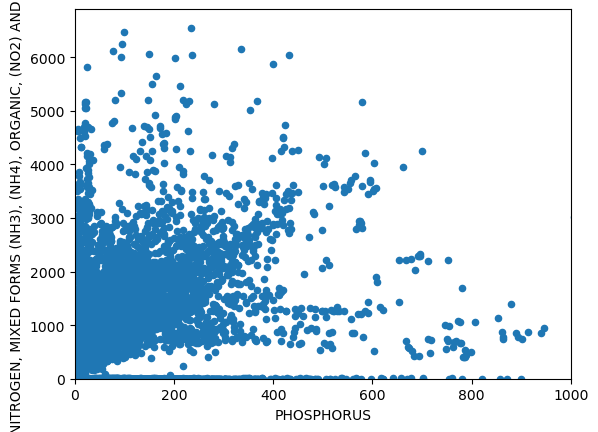

In [12]:
#Nitrogen vs Phosphorus Plot
df.plot(kind='scatter',y = 'NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)', x = 'PHOSPHORUS',ylim=(0,6900),xlim=(0,1000))
df_MF.plot(kind='scatter',y = 'NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)', x = 'PHOSPHORUS',ylim=(0,6900),xlim=(0,1000))
df_KNN.plot(kind='scatter',y = 'NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)', x = 'PHOSPHORUS',ylim=(0,6900),xlim=(0,1000))



In [ ]:
#Nitrogen vs Chlorophyll A, corrected plot
df.plot(kind='scatter',y = 'NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)', x = 'CHLOROPHYLL A, CORRECTED FOR PHEOPHYTIN',xlim=(0,1000),ylim=(0,7000))
df_MF.plot(kind='scatter',y = 'NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)', x = 'CHLOROPHYLL A, CORRECTED FOR PHEOPHYTIN',xlim=(0,1000),ylim=(0,7000))
df_KNN.plot(kind='scatter',y = 'NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)', x = 'CHLOROPHYLL A, CORRECTED FOR PHEOPHYTIN',xlim=(0,1000),ylim=(0,7000))


In [ ]:
#Nitrogen vs Secchi Disk Depth
df.plot(kind='scatter',y = 'NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)', x = 'DEPTH, SECCHI DISK DEPTH',ylim=(0,6900),xlim=(0,700))
df_MF.plot(kind='scatter',y = 'NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)', x = 'DEPTH, SECCHI DISK DEPTH',ylim=(0,6900),xlim=(0,700))
df_KNN.plot(kind='scatter',y = 'NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)', x = 'DEPTH, SECCHI DISK DEPTH',ylim=(0,6900),xlim=(0,700))


In [ ]:
#Nitrogen vs Orthophosphate
df.plot(kind='scatter',y = 'NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)', x = 'ORTHOPHOSPHATE',ylim=(0,6900),xlim=(0,700))
df_MF.plot(kind='scatter',y = 'NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)', x = 'ORTHOPHOSPHATE',ylim=(0,6900),xlim=(0,700))
df_KNN.plot(kind='scatter',y = 'NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)', x = 'ORTHOPHOSPHATE',ylim=(0,6900),xlim=(0,700))

In [ ]:
X = X_MF

In [ ]:
#Making train and test sets only from important features
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.5,random_state = 1)

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

model = RandomForestRegressor()


model.fit(X_train, Y_train)
train_accuracy = model.score(X_train, Y_train)
print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
test_accuracy = model.score(X_test, Y_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')

In [ ]:
important_features = pd.Series(data=model.feature_importances_,index=X_train.columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor


model = KNeighborsRegressor()


model.fit(X_train, Y_train)
train_accuracy = model.score(X_train, Y_train)
print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
test_accuracy = model.score(X_test, Y_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')

In [ ]:
from sklearn.tree import DecisionTreeRegressor


model = DecisionTreeRegressor()


model.fit(X_train, Y_train)
train_accuracy = model.score(X_train, Y_train)
print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
test_accuracy = model.score(X_test, Y_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')

In [ ]:
from sklearn import svm


model = svm.SVR()
model.fit(X_train, Y_train)
train_accuracy = model.score(X_train, Y_train)
print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
test_accuracy = model.score(X_test, Y_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')

Scaling Train and Test Sets

In [ ]:
#Because we separated the input and output previously, if scale them separately
#it can cause inaccurate results. The code below addresses the issue
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
print(X_train_scaled.mean(axis=0))
print(X_test_scaled.mean(axis=0))

In [ ]:
#Scaled RF accuracy
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

model = RandomForestRegressor()
#random_state=True,warm_start=True,criterion='absolute_error',max_depth=100

model.fit(X_train_scaled, Y_train)
train_accuracy = model.score(X_train_scaled, Y_train)
print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
test_accuracy = model.score(X_test_scaled, Y_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')

Cross-validation

In [ ]:
from sklearn.model_selection import KFold, ShuffleSplit, cross_val_score

clf = RandomForestRegressor()

k_folds = KFold(n_splits = 10)
shuffle_split = ShuffleSplit(n_splits=10,test_size=.2)

scores = cross_val_score(clf, X, Y, cv = shuffle_split)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))